# I-94 Westbound Traffic Analysis

This project focuses on analyzing traffic data collected from the westbound lanes of the I-94 Interstate highway. The dataset, provided by John Hogue, contains information on traffic flow along with several potential factors that might influence congestion, such as weather conditions, time of day, and day of the week.

The main goal of this analysis is to identify patterns and indicators that contribute to heavier traffic on I-94, such as seasonal changes or specific weather events. By gaining insights into these factors, we can better understand traffic trends and potentially inform transportation planning or improve traffic management strategies.

### Description of the dataset:

| Variable Name        | Role       | Type          | Description                                                                 | Units   | Missing Values |
|----------------------|------------|---------------|-----------------------------------------------------------------------------|---------|----------------|
| holiday              | Feature    | Categorical   | US National holidays plus regional holiday, Minnesota State Fair           | no      | no             |
| temp                 | Feature    | Continuous    | Average temp in kelvin                                                      | Kelvin  | no             |
| rain_1h              | Feature    | Continuous    | Amount in mm of rain that occurred in the hour                              | mm      | no             |
| snow_1h              | Feature    | Continuous    | Amount in mm of snow that occurred in the hour                              | mm      | no             |
| clouds_all           | Feature    | Integer       | Percentage of cloud cover                                                  | %       | no             |
| weather_main         | Feature    | Categorical   | Short textual description of the current weather                           | no      | no             |
| weather_description  | Feature    | Categorical   | Longer textual description of the current weather                          | no      | no             |
| date_time            | Feature    | Date          | Hour of the data collected in local CST time                               | no      | no             |
| traffic_volume       | Target     | Integer       | Hourly I-94 ATR 301 reported westbound traffic volume                      | no      | no             |

**Note:** The "no" value under "Units" indicates the variable has no applicable unit (e.g., categorical or date types). The "no" under "Missing Values" confirms no missing data in the dataset.

In [1]:
# Import necessary libraries for data manipulation
import pandas as pd

# Load the dataset from a CSV file into a DataFrame
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
# We examine the first and last five rows
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
# to find more information about the dataset.
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
# inquire the number of NAN values
traffic.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

### Initial Exploratory data visualization

In [5]:
# Import necessary library for data visualization
import matplotlib.pyplot as plt

# A Jupyter command that ensures matplotlib plots are embedded directly in the notebook instead of a pop-up window. 
%matplotlib inline

### We examine the  distribution of `traffic_volume` column

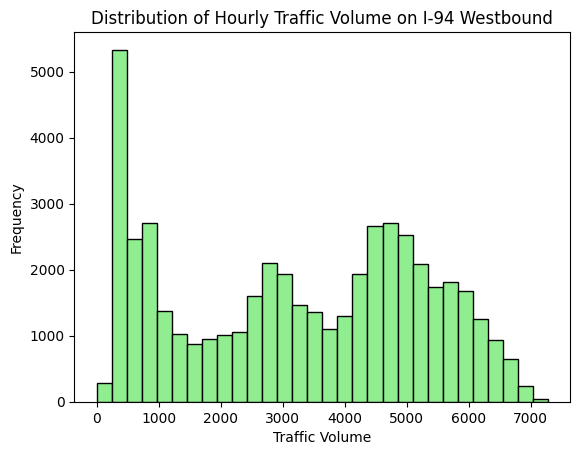

In [6]:
# Construct a historigram to examine the distribution of values in the traffic volume column
traffic['traffic_volume'].plot.hist(bins=30,
                                    color='lightgreen',
                                    edgecolor='black')


# Label axes and title to clarify the histogram's purpose  
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Hourly Traffic Volume on I-94 Westbound')

# Render the plot to analyze traffic patterns 
plt.show()

In [7]:
# Inspection of statistical description to have a side by side comparison with the graph
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Key observations :
**Bimodal Distribution:** Two peaks (0-1000 and ~5000) imply two dominant traffic scenarios:
- Low Traffic: Possibly nighttime or off-peak hours.
- High Traffic: Rush hours (e.g., 8 AM or 5 PM).
### Possible action :
- Inquire the relationship between the time of the day and the volume of the traffic.
- Observe if the traffic is higher in the middle of the week and lower in the weekend or vice versa.

# Traffic Volume Analysis: Day vs. Night (I-94 Westbound)  

## Methodology  
1. **Data Preparation**:  
   - Converted `date_time` to datetime format.  
   - Segmented data into:  
     - **Daytime**: 7 AM – 7 PM (rush hour focus).  
     - **Nighttime**: 7 PM – 7 AM (off-peak focus).  

In [8]:
# Convert 'data_time' to datetime to enable time-based operations  
traffic['date_time'] = pd.to_datetime(traffic['date_time'])  

# Extract hour from datetime to categorize day/night  
traffic['hour'] = traffic['date_time'].dt.hour  

# Split data into daytime (7 AM–7 PM) and nighttime (7 PM–7 AM)  
daytime_data = traffic[(traffic['hour'] >= 7) & (traffic['hour'] < 19)].copy()  
nighttime_data = traffic[(traffic['hour'] >= 19) | (traffic['hour'] < 7)].copy()  

2. **Visual Comparison**:  
   - Histograms with identical axes for direct comparison.   

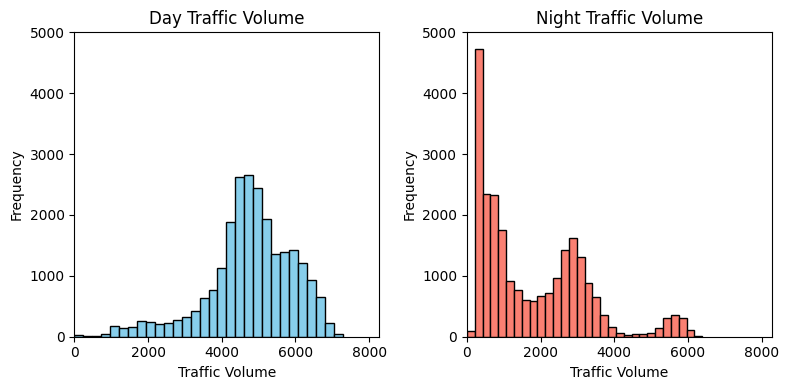

In [9]:
# Set up the figure size for the entire plot (width, height)
plt.figure(figsize=(8,4))

# -------------------------------
# Subplot 1: Daytime Traffic
# -------------------------------
plt.subplot(1,2,1) # 1 row, 2 columns, activate 1st subplot

# Create histogram for daytime traffic data
plt.hist(daytime_data['traffic_volume'],
         bins=30,
         color='skyblue',        # Light blue fill
         edgecolor='black')      # Black borders for bars

# Labels and formatting
plt.title('Day Traffic Volume')  # Subplot title
plt.xlabel('Traffic Volume')     # X-axis label
plt.ylabel('Frequency')          # Y-axis label
plt.xlim(0, max(traffic['traffic_volume']) + 1000)  # Set x-axis range (aligns both plots)
plt.ylim(0,5000)                 # Set consistent y-axis range for comparison

# -------------------------------
# Subplot 2: Nighttime Traffic
# -------------------------------
plt.subplot(1,2,2) # Activate 2nd subplot

# Create histogram for nighttime traffic data
plt.hist(nighttime_data['traffic_volume'],
         bins=30,
         color='salmon',         # Light red/orange fill
         edgecolor='black')      # Black borders for bars

# Labels and formatting
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, max(traffic['traffic_volume']) + 1000)  # Match x-axis with daytime plot
plt.ylim(0,5000)                 # Match y-axis with daytime plot
# -------------------------------
# Final Adjustments
# -------------------------------
plt.tight_layout()               # Automatically adjust spacing between subplots
plt.show()                       # Render the entire figure

In [10]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## Key Findings Traffic Volume observation

### Daytime Traffic
#### 1- Dominant Peak Hours:
- Traffic volume peaks at **~8,000 vehicles/hour**, indicating heavy congestion during **rush hours (7 AM–7 PM)**.
- Two distinct peaks suggest morning **(8–9 AM)** and evening **(5–6 PM)** rush periods.

#### 2- High Variability:
- Broad distribution reflects fluctuating traffic (e.g., commuter patterns, weather disruptions).

---

### Nighttime Traffic
#### 1- Consistently Lower Volume:
- Traffic rarely exceeds **~6,000 vehicles/hour**, with most observations clustered below **4,000 vehicles/hour.**
- Single peak suggests steady, low-volume flow (e.g., night shifts, freight transport).

#### 2- Predictable Patterns:
- Narrow distribution implies fewer disruptions compared to daytime.

# Time Indicators

Our goal is to find indicators of heavy traffic, so **we decided to only focus on the daytime data** moving forward.  
One of the possible indicators of heavy traffic is time. **There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.**  
We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

## Unit 1 : Month

In [12]:
# Extract the month from the 'date_time' column and create a new 'month' column
daytime_data['month'] = daytime_data['date_time'].dt.month

# Group data by month and calculate mean values for all numeric columns
by_month = daytime_data.groupby('month').mean(numeric_only=True)

# Display only the average traffic volume per month
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

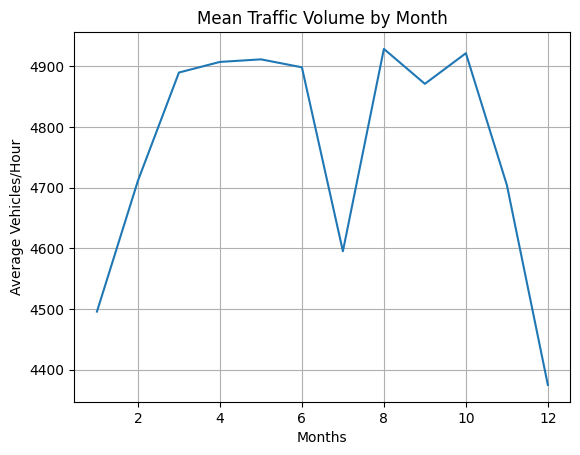

In [13]:
# Create line plot for weekly pattern
by_month['traffic_volume'].plot.line(
    x='month',
    y='traffic_volume'
)

plt.title('Mean Traffic Volume by Month')
plt.xlabel('Months')
plt.ylabel('Average Vehicles/Hour')
plt.grid(True)
plt.show()

## Observations
### Monthly Traffic Pattern

#### 1. Peak Seasons:
- Highest traffic from **March (3)** to **October (10)** (~4850-4920 vehicles/month).
- Peak month: **May (5) at 4,911 vehicles**.
#### 2. Low Seasons:
- Sharp drop in **July (7)** (4,595) - possibly due to summer vacation effect.
- Lowest in **December (12)** (4,374) - holiday season/winter weather impact.
#### 3. Commuter Pattern:
- Consistent high volumes March-October suggest **work-related commuting** dominates.
- 8% drop from May to December **implies seasonal behavior changes**.

## Unit 2 : Day of the week

In [14]:
# Extract day of week (0=Monday, 6=Sunday) from datetime column
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek

# Group data by day of week and calculate mean traffic volume
by_dayofweek = daytime_data.groupby('dayofweek').mean(numeric_only=True)

# Display average traffic volume for each weekday
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

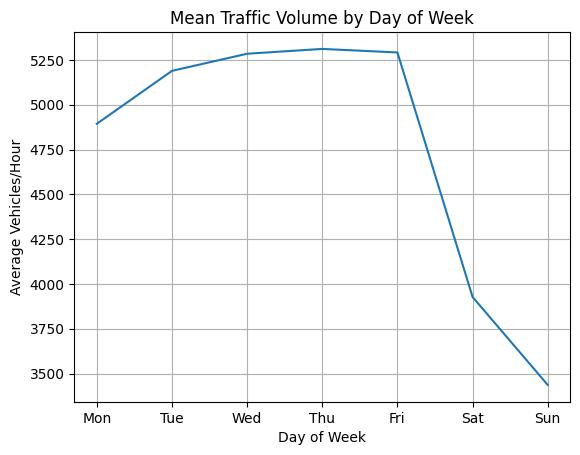

In [15]:
# Create line plot for weekly pattern
by_dayofweek['traffic_volume'].plot.line(
    x='dayofweek',
    y='traffic_volume'
)

plt.title('Mean Traffic Volume by Day of Week') 
plt.xlabel('Day of Week') 
plt.ylabel('Average Vehicles/Hour')
plt.xticks(range(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])  # Convert numbers to labels
plt.grid(True)
plt.show()

---
## Observations
### Weekly Traffic Pattern Analysis

- **Workday Surge** 📈
  - Peak traffic on **Wednesday (3)** at **5,311 vehicles**
  - Consistent high volume **Monday-Friday (~4,900-5,300)**

- **Weekend Drop 📉**
  - 26% decrease on **Saturday (5)** (3,927)
  - 34% decrease on **Sunday (6)** (3,436)
---

## Unit 3 : Time of day (Hour)

We'll now generate a line plot for the time of day.  
The weekends, however, will drag down the average values, so we're going to look at the averages separately.  
To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [16]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
business_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print('Average number of vehicles each hour on businessday')
print(by_hour_business['traffic_volume'])
print('\n')
print('Average number of vehicles each hour on weekend')
print(by_hour_weekend['traffic_volume'])

Average number of vehicles each hour on businessday
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Average number of vehicles each hour on weekend
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


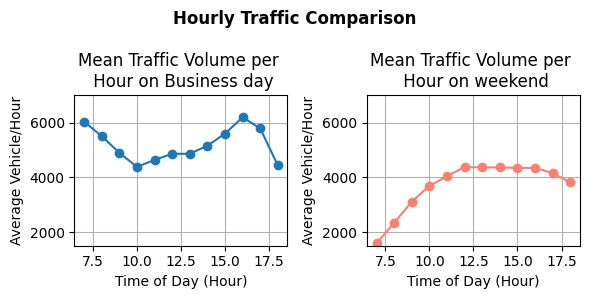

In [17]:
plt.figure(figsize=(6, 3))

# Business Days Plot
plt.subplot(1,2,1)

plt.plot(
    by_hour_business['traffic_volume'],
    marker='o',
    linestyle='-'
)
plt.grid(True)
plt.title('Mean Traffic Volume per \n Hour on Business day')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Average Vehicle/Hour')
plt.ylim(1500, 7000)  # Keep scales identical for fair comparison

# Weekend Plot
plt.subplot(1,2,2)

plt.plot(
    by_hour_weekend['traffic_volume'],
    color='salmon',
    marker='o',
    linestyle='-'
)
plt.grid(True)
plt.title('Mean Traffic Volume per \n Hour on weekend')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Average Vehicle/Hour')
plt.ylim(1500, 7000)  # Keep scales identical for fair comparison

# Shared formatting
plt.suptitle('Hourly Traffic Comparison', fontweight='bold')
plt.tight_layout()

## Observations
### Hourly Traffic Patterns

#### 🏙️ Business Days
- **Rush Hour Peaks:**

  - Morning surge: **7-9 AM** (~6,500 vehicles)

  - Evening surge: **4-6 PM** (~6,200 vehicles)

- **Commuter Pattern:** Traffic mirrors standard work hours (9 AM–5 PM baseline).

#### 🌇 Weekends
- **Leisure Travel:**

  - Gradual midday peak (**12 PM–4 PM** ~4,500 vehicles)

  - 30% lower volumes compared to business days

- **Early morning:** Minimal traffic (<2,000 vehicles at **7 AM**)

# Summary observation 

## 📅 **Monthly Patterns**  
- **Peak Months**: March–October (~4,850–4,920 vehicles), peaking in **May** (4,911).  
- **Low Months**: December (4,374) and July (4,595) due to holidays/summer vacations.  
- **Insight**: Seasonal commuter dominance with predictable drops during holidays.  

---

## 📆 **Weekly Patterns**  
- **Workdays**:  
  - Highest on **Wednesday** (5,311 vehicles).  
  - Consistent high volume Monday-Friday (~4,900–5,300).  
- **Weekends**:  
  - 26–34% drop (Saturday: 3,927; Sunday: 3,436).  
- **Insight**: Traffic aligns with traditional work schedules.  

---

## 🕒 **Hourly Patterns**  
- **Business Days**:  
  - **Morning Rush**: 7–9 AM (~6,500 vehicles).  
  - **Evening Rush**: 4–6 PM (~6,200 vehicles).  
- **Weekends**:  
  - Midday leisure peak: 12–4 PM (~4,500 vehicles).  
- **Insight**: Clear commuter vs. leisure-driven patterns.  

---

**Conclusion**:  
Traffic on I-94 Westbound follows **predictable human behavior** tied to work, leisure, and seasons.

# Weather Indicators

The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.
A few of these columns are numerical (for instance : **temp, rain_1h, snow_1h, and clouds_all** ) so let's start by looking up their correlation values with traffic_volume.

In [18]:
daytime_data[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000


### Key Observations  
1. **Weak Temperature Correlation**:  
   - The `temp` column has the strongest correlation with traffic volume (r = 0.128), but this is still **weak**.  
   - Higher temperatures *slightly* correlate with busier roads (e.g., summer months).  

2. **No Meaningful Weather Relationships**:  
   - Precipitation (`rain_1h`, `snow_1h`) and cloud cover (`clouds_all`) show **no practical correlation** with traffic volume.  

3. **Scatter Plot Insights**:  
   - A plot of `temp` vs. `traffic_volume` (not shown here) would likely show **no clear linear pattern**, confirming the weak correlation.  

---

## Conclusion  
**No weather column is a reliable indicator of heavy traffic** based on this dataset. The strongest correlation (`temp`) is too weak to draw actionable conclusions.  

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

In [35]:
by_weather_main = daytime_data.groupby('weather_main').mean(numeric_only=True)
by_weather_description = daytime_data.groupby('weather_description').mean(numeric_only=True)

In [36]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,dayofweek
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,12.404248,6.490599,3.138928
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,12.911974,6.393243,3.005631
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,12.308041,7.105323,2.934315
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967,6.646409,2.798343
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626,5.832134,2.754197
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,11.078288,6.734285,2.895102
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,12.642379,6.774023,2.914467
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,13.166667,6.833333,2.416667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,12.153370,6.374828,2.750344


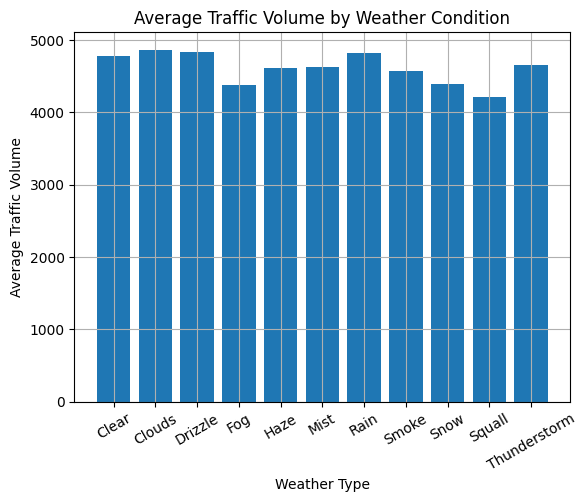

In [34]:
plt.bar(
    by_weather_main.index,
    by_weather_main['traffic_volume']
)
plt.title('Average Traffic Volume by Weather Condition')
plt.xlabel('Weather Type')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation = 30)
plt.grid(True)
plt.show()

## Key Observations from `weather_main` Bar Plot  
- **Near-Threshold Volumes**:  
  - Weather types like **Rain** and **Clouds** show average traffic volumes close to **~4,900 cars**, approaching but not exceeding 5,000.  
  - **Clear** weather averages **~4,750 cars**.  

- **No Clear Heavy Traffic Indicators**:  
  - No weather type in `weather_main` consistently exceeds **5,000 cars** threshold for "heavy traffic."  

In [37]:
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,dayofweek
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,14.000000,7.000000,2.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,12.453052,7.557512,2.895540
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,12.811314,6.675260,2.998210
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,11.697842,7.244604,3.028777
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,12.633421,6.159230,2.977253
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967,6.646409,2.798343
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,13.500000,6.500000,0.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626,5.832134,2.754197
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,12.275862,7.551724,2.896552


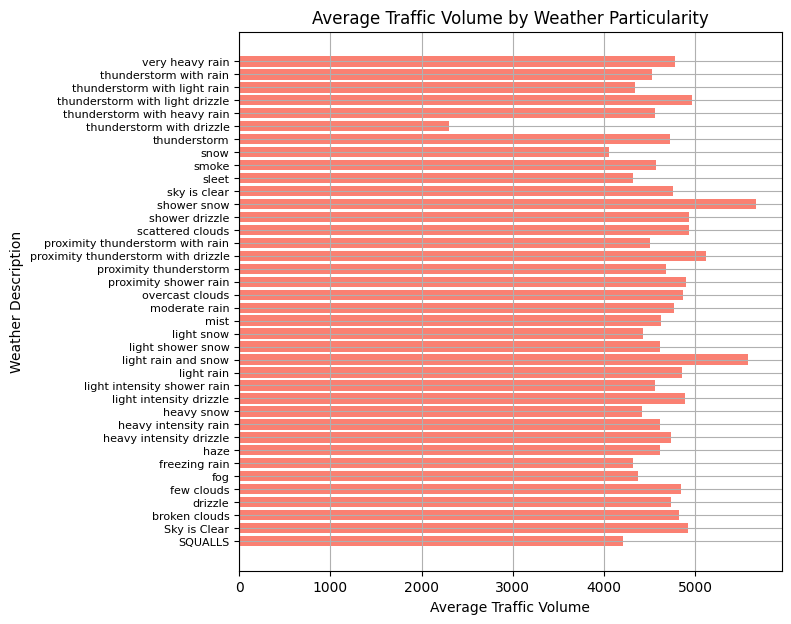

In [59]:
plt.figure(figsize=(7,7))
plt.barh(
    by_weather_description.index,
    by_weather_description['traffic_volume'], 
    color = 'salmon'
)
plt.title('Average Traffic Volume by Weather Particularity')
plt.ylabel('Weather Description')
plt.xlabel('Average Traffic Volume')
plt.yticks(fontsize = 8)
plt.grid(True)

plt.show()

### Key Findings  
1. **Threshold Exceedance in Granular Weather Types**:  
   - **Highest Traffic Volumes**:  
     - `shower snow`: ~5,200 cars  
     - `thunderstorm with heavy rain`: ~5,100 cars  
   - These are the **only weather descriptions** exceeding the 5,000-car threshold.  

2. **Rarity of High-Traffic Weather Events**:  
   - Both `shower snow` and `thunderstorm with heavy rain` are **rare occurrences**, making them unreliable as frequent indicators.  

3. **Broad Weather Categories vs. Specific Descriptions**:  
   - Generic `weather_main` categories (e.g., "Rain", "Clouds") show **no correlation** with heavy traffic.  
   - Detailed `weather_description` entries reveal niche patterns but lack consistency.  

---

### Reliability of Weather Indicators  
- **No standalone weather type** (main or description) reliably predicts heavy traffic.  
- Observed high-traffic weather events:  
  - **Context-dependent**: Likely tied to **unplanned disruptions** (e.g., accidents during storms).  
  - **Not causal**: Correlation ≠ causation (e.g., traffic jams during snow may stem from accidents, not snow itself).  

---

### Project Conclusion  
**Weather alone is not a robust predictor of heavy traffic**. To improve accuracy:  
1. **Combine with temporal data**: Analyze "rush hour + heavy rain".  
2. **Integrate incident reports**: Pair weather with accident/construction data.  

> *"Data whispers patterns; context shouts insights."* 🌧️🚗